# Inequality on Health Impacts from Air Pollution in Canadian Cities
## 323 Final Project

In [205]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import re

from shapely.geometry import Point, shape, Polygon, MultiPolygon
import fiona

%matplotlib inline

In [41]:
gini_import = pd.read_excel("./Data/gini.xlsx")

In [42]:
homicide_import = pd.read_excel("./Data/Homicide rate.xlsx", skipfooter = 4)

In [43]:
air_quality_import = pd.read_csv("./Data/WHO_air_quality_database_2018_v14_merged.csv")

In [387]:
health_names = ["Hamilton", "Kelowna", "Montreal", "Ottawa", "Quebec", "Saguenay", "Sherbrooke", "Toronto", "Trois-Rivieres", "Vancouver", "Waterloo", "Windsor", "Winnipeg", "Abbotsford"]
health_data_array = {}
selected_rows = ["Perceived health; very good or excellent (%)", "Lung cancer incidence (per 100000 population)", "Current smoker; daily or occasional (%)", "Current smoker; daily (%)", "Leisure-time physical activity; moderately active or active (%)", "Second-hand smoke; exposure at home (%)", "Second-hand smoke; exposure in vehicles and/or public places (%)", "Asthma (%)", "Lung cancer; deaths (per 100000 population)", "Respiratory diseases; deaths (per 100000 population)", "Low income (%)"]
for name in health_names:
    health_data_array[name] = pd.read_csv("./Data/" + name + "2013.csv", header = 1, skipfooter = 13, engine='python', encoding = "latin-1").replace(np.NaN, 0).replace("..", 0)
    health_data_array[name]["Characteristics"] = health_data_array[name]["Characteristics"].str.strip()
    health_data_array[name] = health_data_array[name].loc[health_data_array[name]["Characteristics"].isin(selected_rows)]


In [388]:
air_quality_canada = air_quality_import.loc[air_quality_import["Country"] == "Canada"]
# air_quality = air_quality_canada.loc
gini_import["Census Metropolitan Area "] = gini_import["Census Metropolitan Area "].str.strip()
cities = gini_import["Census Metropolitan Area "]
air_quality_cities = air_quality_canada.loc[air_quality_canada["City"].isin(cities)]
air_quality_cities = air_quality_cities.append(air_quality_canada.loc[air_quality_canada["City"] == "Ottawa"])
air_quality_cities = air_quality_cities.append(air_quality_canada.loc[air_quality_canada["City"] == "Abbotsford"])
air_quality_cities = air_quality_cities.append(air_quality_canada.loc[air_quality_canada["City"] == "Kitchener"])
air_quality_cities = air_quality_cities.append(air_quality_canada.loc[air_quality_canada["City"] == "Montreal"])
air_quality_cities = air_quality_cities.append(air_quality_canada.loc[air_quality_canada["City"] == "Quebec"])
air_quality_cities = air_quality_cities.append(air_quality_canada.loc[air_quality_canada["City"] == "Trois-Rivieres"])
air_quality_cities["Annual.mean"] = air_quality_cities["Annual.mean"].apply(lambda x: int(re.search("\d+", x)[0]))

In [390]:
cities_df = gpd.read_file("https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lcma000b16a_e.zip")
canada_land_df = gpd.read_file("https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lpr_000b16a_e.zip")
canada_water_df = gpd.read_file("https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lpr_000a16a_e.zip")

In [393]:
cities_df["CMANAME"] = cities_df["CMANAME"].apply(lambda name: name if isinstance(name, str) else name.decode("latin-1"))
cities_df = cities_df.loc[cities_df["CMANAME"].isin(air_quality_cities["City"])]
cities_df

,CMAUID,CMAPUID,CMANAME,CMATYPE,PRUID,PRNAME,geometry
42,408,24408,Saguenay,B,24,b'Quebec / Qu\xe9bec',"POLYGON ((7718195.920 1638696.611, 7718179.649..."
48,433,24433,Sherbrooke,B,24,b'Quebec / Qu\xe9bec',"MULTIPOLYGON (((7774913.406 1292660.697, 77740..."
89,535,35535,Toronto,B,35,Ontario,"MULTIPOLYGON (((7217656.320 1019923.029, 72176..."
90,537,35537,Hamilton,B,35,Ontario,"POLYGON ((7189695.983 899176.357, 7189730.409 ..."
100,559,35559,Windsor,B,35,Ontario,"MULTIPOLYGON (((6998812.629 734459.660, 699882..."
112,602,46602,Winnipeg,B,46,Manitoba,"POLYGON ((5866744.469 1613044.774, 5866735.866..."
123,915,59915,Kelowna,B,59,British Columbia / Colombie-Britannique,"POLYGON ((4286695.877 1990947.663, 4287777.391..."
129,933,59933,Vancouver,B,59,British Columbia / Colombie-Britannique,"MULTIPOLYGON (((4042996.157 2027876.066, 40452..."


D:\Program Data\Anaconda3\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
D:\Program Data\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
D:\Program Data\Anaconda3\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
D:\Program Data\Anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.c

,CMAUID,CMAPUID,CMANAME,CMATYPE,PRUID,PRNAME,geometry
42,408,24408,Saguenay,B,24,b'Quebec / Qu\xe9bec',POINT (7718195.920 1638696.611)
48,433,24433,Sherbrooke,B,24,b'Quebec / Qu\xe9bec',POINT (7774913.406 1292660.697)
89,535,35535,Toronto,B,35,Ontario,POINT (7217656.320 1019923.029)
90,537,35537,Hamilton,B,35,Ontario,POINT (7189695.983 899176.357)
100,559,35559,Windsor,B,35,Ontario,POINT (6998812.629 734459.660)
112,602,46602,Winnipeg,B,46,Manitoba,POINT (5866744.469 1613044.774)
123,915,59915,Kelowna,B,59,British Columbia / Colombie-Britannique,POINT (4286695.877 1990947.663)
129,933,59933,Vancouver,B,59,British Columbia / Colombie-Britannique,POINT (4042996.157 2027876.066)


<AxesSubplot:>

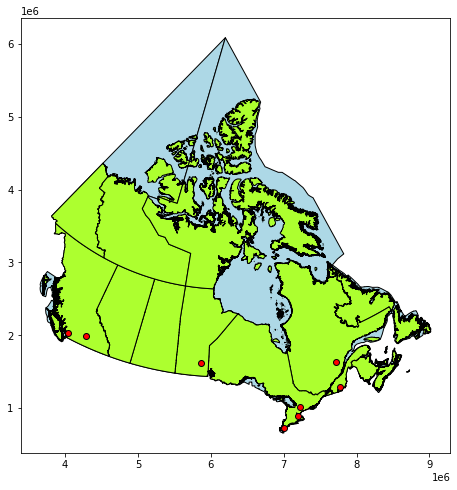

In [395]:
fig, gax = plt.subplots(figsize = (15,8))
canada_water_df.plot(ax = gax, edgecolor = 'black', color = 'lightblue')
canada_land_df.plot(ax = gax, edgecolor = 'black', color = 'greenyellow')
city_points = cities_df.copy()
for name in air_quality_cities["City"]:
    city_row = cities_df.loc[cities_df["CMANAME"] == name]
    if len(city_row) == 0:
        continue
    city_index = list(city_row.index)[0]
    city_shape = cities_df.loc[city_index]["geometry"]
    poly = ""
    if isinstance(city_shape, Polygon):
        poly = city_shape
    else:
        poly = list(city_shape)[0]
    x, y = poly.exterior.coords.xy
    city_points["geometry"].at[city_index] = Point(x[0], y[0])
display(city_points)
city_points.plot(ax = gax, edgecolor = 'black', color = 'red')
    
# plt.plot()

In [396]:
display(city_points)

,CMAUID,CMAPUID,CMANAME,CMATYPE,PRUID,PRNAME,geometry
42,408,24408,Saguenay,B,24,b'Quebec / Qu\xe9bec',POINT (7718195.920 1638696.611)
48,433,24433,Sherbrooke,B,24,b'Quebec / Qu\xe9bec',POINT (7774913.406 1292660.697)
89,535,35535,Toronto,B,35,Ontario,POINT (7217656.320 1019923.029)
90,537,35537,Hamilton,B,35,Ontario,POINT (7189695.983 899176.357)
100,559,35559,Windsor,B,35,Ontario,POINT (6998812.629 734459.660)
112,602,46602,Winnipeg,B,46,Manitoba,POINT (5866744.469 1613044.774)
123,915,59915,Kelowna,B,59,British Columbia / Colombie-Britannique,POINT (4286695.877 1990947.663)
129,933,59933,Vancouver,B,59,British Columbia / Colombie-Britannique,POINT (4042996.157 2027876.066)


In [197]:
# poly = ""
# test = cities_df["geometry"][0]
# if isinstance(test, Polygon):
#     poly = test
# else:
#     poly = list(test)[0]
# x, y = poly.exterior.coords.xy
# x[0]
# y[0]
# city = cities_df.loc[cities_df["CMANAME"] == name]["geometry"]
# city[list(city.index)[0]]
# (49.2827, 123.1207).apply(Point)
Point(49.2827, 123.1207)
city_row = cities_df.loc[cities_df["CMANAME"] == "Vancouver"]
display(city_row)
city_index = city_row.index
display(list(city_index)[0])
city_shape = cities_df.loc[city_index]["geometry"]
display(list(city_shape.index)[0])

,CMAUID,CMAPUID,CMANAME,CMATYPE,PRUID,PRNAME,geometry
129,933,59933,Vancouver,B,59,British Columbia / Colombie-Britannique,"MULTIPOLYGON (((4042996.157 2027876.066, 40452..."


129

[129]

In [397]:
aq_vs_health = air_quality_cities["City"].copy().to_frame().join(air_quality_cities["Annual.mean"].copy())
aq_vs_health = aq_vs_health.set_index("City")
aq_vs_health = aq_vs_health.rename(index={"Kitchener": "Waterloo"})
for col in selected_rows:
    col = col.strip()
    aq_vs_health[col] = pd.Series(dtype = "float64")
for name, df in health_data_array.items():
    for col in selected_rows:
        col = col.strip()
        aq_vs_health[col].at[name] = list(df.loc[df["Characteristics"] == col, "Total"])[0]
#         print(list(df.loc[df["Characteristics"] == col, "Total"])[0])
# list(health_data_array["Toronto"].loc[health_data_array["Toronto"]["Characteristics"] == "Perceived health; very good or excellent (%)"]["Total"])[0]


In [406]:
aq_vs_health

,Annual.mean,Perceived health; very good or excellent (%),Lung cancer incidence (per 100000 population),Current smoker; daily or occasional (%),Current smoker; daily (%),Leisure-time physical activity; moderately active or active (%),Second-hand smoke; exposure at home (%),Second-hand smoke; exposure in vehicles and/or public places (%),Asthma (%),Lung cancer; deaths (per 100000 population),Respiratory diseases; deaths (per 100000 population),Low income (%)
City,,,,,,,,,,,,
Hamilton,17,59.7,55.5,20.5,16.9,57.5,4.8,15.6,8.4,42.7,41.5,15.7
Kelowna,16,60.2,47.1,18.5,14.6,67.5,0.0,10.9,9.3,38.5,40.1,13.4
Saguenay,15,58.7,79.8,22.3,16.8,52.6,8.3,17.3,12.5,57.9,52.2,12.7
Sherbrooke,12,63.7,71.4,19.2,16.3,51.3,6.5,12.7,6.6,53.1,38.8,16.2
Toronto,16,60.9,44.4,16.8,11.8,49.2,4.1,15.9,6.4,31.7,36.3,17.7
Vancouver,12,60.7,48.9,12.1,7.9,57.2,2.1,16.8,6.8,35.7,43.4,20.3
Windsor,17,59.3,55.9,16.3,11.5,51.8,5.4,19.1,5.8,44.5,41.8,17.0
Winnipeg,22,59.1,54.0,18.8,12.9,56.6,4.1,19.2,9.4,43.9,43.3,18.1
Ottawa,12,63.6,56.1,17.6,12.6,60.4,4.5,22.5,10.1,45.3,39.1,13.5


<AxesSubplot:xlabel='Annual.mean', ylabel='Asthma (%)'>

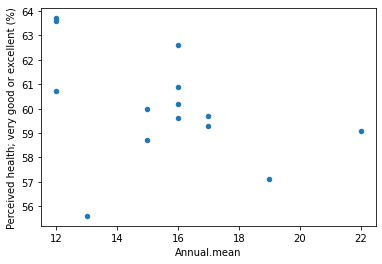

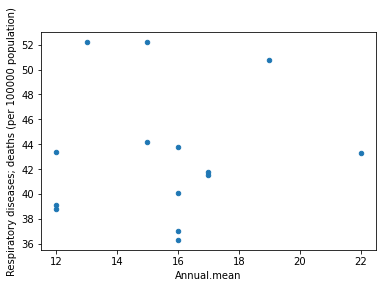

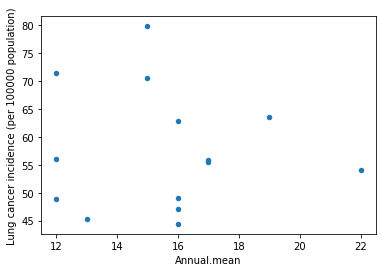

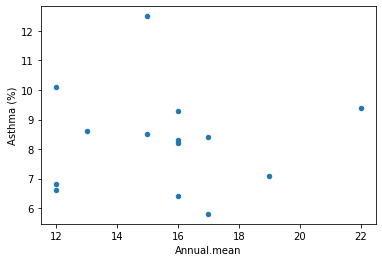

In [408]:
aq_vs_health.plot.scatter(x = "Annual.mean", y = "Perceived health; very good or excellent (%)")
aq_vs_health.plot.scatter(x = "Annual.mean", y = "Respiratory diseases; deaths (per 100000 population)")
aq_vs_health.plot.scatter(x = "Annual.mean", y = "Lung cancer incidence (per 100000 population)")
aq_vs_health.plot.scatter(x = "Annual.mean", y = "Asthma (%)")